In [45]:
# Import pandas library
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rc
from matplotlib.ticker import MaxNLocator
    

In [55]:

# initialize list of lists
# data1and3 = [[5, 223, 13648, 0.990871], [10, 220, 13647, 0.991178], [15, 227, 13648, 0.990958], [20, 208, 13647, 0.991778], [25, 211, 13648, 0.991559]]
# data2 = [[5, 409, 25009, 0.997777], [10, 220, 13647, 0.991178], [15, 141, 9381, 0.989916], [20, 120, 7147, 0.988527], [25, 96, 5761, 0.987989]]
 
# # Create the pandas DataFrame
# df1and3 = pd.DataFrame(data1and3, columns=['t_update', 'avg cache-hit', 'avg total queries', 'average query delay'])
# df2 = pd.DataFrame(data2, columns=['t_query', 'avg cache-hit', 'avg total queries', 'average query delay'])
 

# print (df1and3)
# print (df2)

df = pd.read_csv('results.csv')

# fixed t_update = 10
df.columns = df.columns.str.replace(' ', '')
print (df.columns)

df["cahce_hit_ratio"] = (df["avg_total_cache_hit"] / df["avg_total_queries"])
df


Index(['t_update', 't_query', 'avg_total_queries', 'avg_total_cache_hit',
       'cahce_hit_ratio', 'avg_query_delay'],
      dtype='object')


,t_update,t_query,avg_total_queries,avg_total_cache_hit,cahce_hit_ratio,avg_query_delay
0,5.0,10.0,13178.0,207.0,0.015708,1.461330
1,10.0,10.0,13078.0,214.0,0.016363,1.454408
2,15.0,10.0,13130.0,209.0,0.015918,1.436965
3,20.0,10.0,13143.0,213.0,0.016206,1.424505
4,25.0,10.0,13130.0,209.0,0.015918,1.440255
5,10.0,5.0,21631.0,350.0,0.016180,1.940423
6,10.0,15.0,9200.0,149.0,0.016196,1.260141
7,10.0,20.0,7092.0,110.0,0.015510,1.205529
8,10.0,25.0,5773.0,93.0,0.016109,1.166401


In [56]:


df1and3 = df.loc[df['t_query'] == 10.0].copy()
df1and3.sort_values(
     by="t_update",
    ascending=False
 )

df2 = df.loc[df['t_update'] == 10.0].copy()
df2 = df2.sort_values(
     by="t_query",
    ascending=True
 )

# fixed t_query = 10


df1 = df1and3.drop(["avg_total_queries", "avg_query_delay", "avg_total_cache_hit"], axis = 1).copy()
df2 = df2.drop(["avg_total_queries", "avg_total_cache_hit", "cahce_hit_ratio"], axis = 1)
df3 = df1and3.drop(["avg_total_queries", "avg_total_cache_hit", "cahce_hit_ratio"], axis = 1).copy()


print (df1)
print (df2)
print (df3)


   t_update  t_query  cahce_hit_ratio
0       5.0     10.0         0.015708
1      10.0     10.0         0.016363
2      15.0     10.0         0.015918
3      20.0     10.0         0.016206
4      25.0     10.0         0.015918
   t_update  t_query  avg_query_delay
5      10.0      5.0         1.940423
1      10.0     10.0         1.454408
6      10.0     15.0         1.260141
7      10.0     20.0         1.205529
8      10.0     25.0         1.166401
   t_update  t_query  avg_query_delay
0       5.0     10.0         1.461330
1      10.0     10.0         1.454408
2      15.0     10.0         1.436965
3      20.0     10.0         1.424505
4      25.0     10.0         1.440255


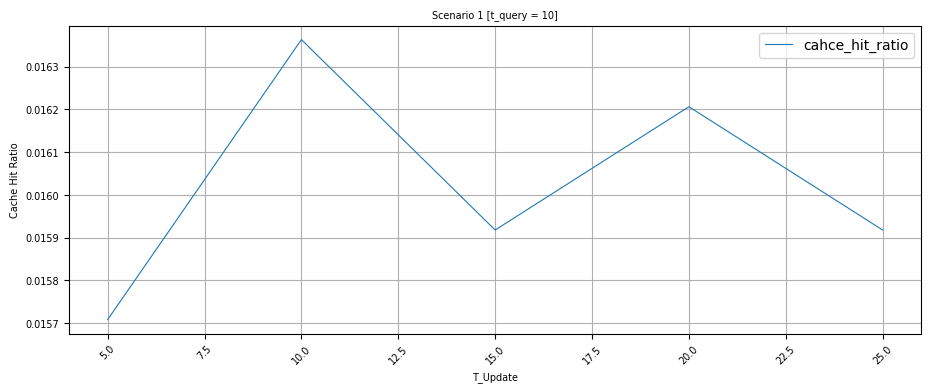

In [58]:
ax = df1.plot(x='t_update', y='cahce_hit_ratio', figsize=(11,4), fontsize=7, linewidth=0.8)
ax.set_title('Scenario 1 [t_query = 10]', fontsize=7)
ax.set_xlabel('T_Update', fontsize=7)
ax.set_ylabel('Cache Hit Ratio', fontsize=7)

ax.grid(True)
plt.xticks(rotation = 45) 
plt.show()


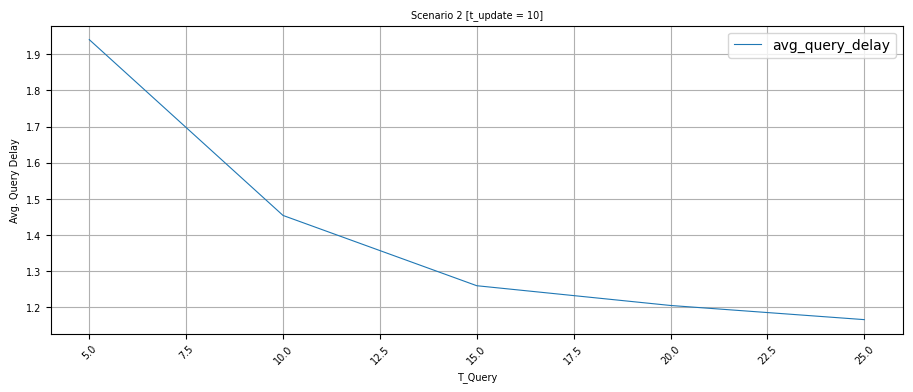

In [59]:

ax = df2.plot(x='t_query', y='avg_query_delay', figsize=(11,4), fontsize=7, linewidth=0.8)
ax.set_title('Scenario 2 [t_update = 10]', fontsize=7)
ax.set_xlabel('T_Query', fontsize=7)
ax.set_ylabel('Avg. Query Delay', fontsize=7)

ax.grid(True)
plt.xticks(rotation = 45) 
plt.show()



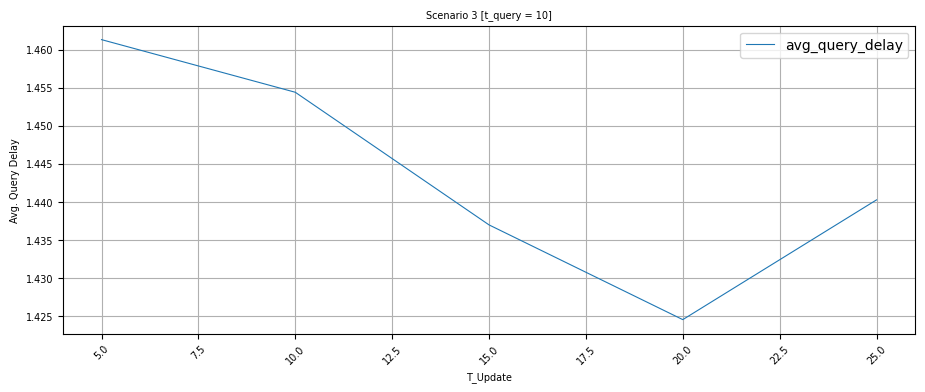

In [60]:
ax = df3.plot(x='t_update', y='avg_query_delay', figsize=(11,4), fontsize=7, linewidth=0.8)
ax.set_title('Scenario 3 [t_query = 10]', fontsize=7)
ax.set_xlabel('T_Update', fontsize=7)
ax.set_ylabel('Avg. Query Delay', fontsize=7)

ax.grid(True)
plt.xticks(rotation = 45) 
plt.show()
